Assignment5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn import linear_model

Ground Cricket Chirps

In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

Tasks

Find the linear regression equation for this data.

Chart the original data and the equation on the chart.

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

##1.Find the linear regression equation for this data.

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.shape

(15, 2)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

##2.Chart the original data and the equation on the chart.

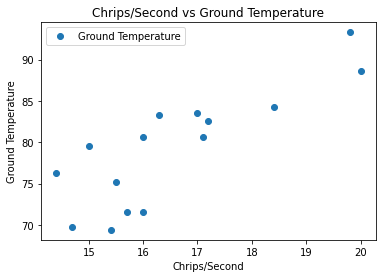

In [ ]:
df.plot(x="Chirps/Second",y="Ground Temperature",style="o")
plt.title("Chrips/Second vs Ground Temperature")
plt.xlabel("Chrips/Second")
plt.ylabel("Ground Temperature")
plt.show()

In [ ]:
df["Ground Temperature"].values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


#There is linear Relationship in (Chirps /Second vs Ground Temperature) data. No transformation Required .

In [ ]:
df["Ground Temperature"].values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

#split The data 

In [ ]:
X=df.loc[:,["Chirps/Second"]].values
Y=df.loc[:,"Ground Temperature"].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3,random_state=20)



In [ ]:
Y_test

array([76.3, 82.6, 69.4, 71.6, 75.2])

In [ ]:
X_train.shape , X_test.shape

((10, 1), (5, 1))

#Scaling The Data 

In [ ]:
 from sklearn.preprocessing import StandardScaler # importing the required function
 scaler = StandardScaler() #initialis
 scaler.fit(X_train) # find the values of mu and sigma
 X_train = scaler.transform(X_train)
 X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

Scaling is not mandatory in Linear Regression 

In [ ]:
X_test

array([[-1.47007664],
       [ 0.11308282],
       [-0.90466255],
       [-0.56541409],
       [-0.84812114]])

#Model

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

81.51


In [ ]:
print(regressor.coef_)

[5.745738]


In [ ]:
regressor.predict([[95]])

array([627.35510959])

In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred

array([73.06332481, 82.15974425, 76.31204604, 78.26127877, 76.63691816])

In [ ]:
df = pd.DataFrame({ "Actual":Y_test,"Prediction": Y_pred })
df

,Actual,Prediction
0,76.3,73.063325
1,82.6,82.159744
2,69.4,76.312046
3,71.6,78.261279
4,75.2,76.636918


In [ ]:
regressor.predict([[18]])

array([184.93328392])

In [ ]:
user=np.array(int(input()))
print("ref",regressor.predict(user))

#R2 

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))
regressor.score(X_test,Y_test)


R2- SCORE: -0.02417428819549383


-0.02417428819549383